In [2]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd

ModuleNotFoundError: No module named 'bs4'

In [4]:
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import plotly.express as px
import requests
import csv
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go


ModuleNotFoundError: No module named 'bs4'

In [ ]:
def recup_country(url, name_csv):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  table = soup.find('table')
  df=pd.read_html(str(table))
  df=pd.DataFrame(df[0])
  df.to_csv(name_csv, index=False)

In [ ]:
def recup_medal(url, name_csv):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  table_medal = soup.find('table', {'class': 'wikitable sortable plainrowheaders jquery-tablesorter'})    
  df=pd.read_html(str(table_medal))
  df=pd.DataFrame(df[0])
  df["latitude"] = ""
  df["longitude"] = ""
  df.loc[2, 'Team'] = "Japan"
  df.to_csv(name_csv, index=False)
  return df

In [9]:
pip install wikipedia

     |████████████████████████████████| 128 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 161 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 353 kB/s  eta 0:00:01
     |████████████████████████████████| 140 kB 14.5 MB/s eta 0:00:01
Using legacy 'setup.py install' for wikipedia, since package 'wheel' is not installed.
    Running setup.py install for wikipedia ... done
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
import wikipedia

In [ ]:
url_jo_2020 = wikipedia.page('2020_Summer_Olympics_medal_table')
df = recup_medal('https://en.wikipedia.org/wiki/2020_Summer_Olympics_medal_table',"./sample_data/tables_olymp.csv")


In [ ]:
country = []
with open('./sample_data/tables_olymp.csv') as file:
    reader = csv.reader(file)
    line_count = 0
    for row in reader:
        if line_count >= 1:
            country.append(row[1])
        line_count += 1


In [ ]:
pd.read_csv("./sample_data/tables_olymp.csv")

Rank                  NOC  Gold  Silver  Bronze  Total  \
0                     1        United States    39      41      33    113   
1                     2                China    38      32      19     89   
2                     3               Japan*    27      14      17     58   
3                     4        Great Britain    22      20      22     64   
4                     5                  ROC    20      28      23     71   
..                  ...                  ...   ...     ...     ...    ...   
89                   86          Ivory Coast     0       0       1      1   
90                   86               Kuwait     0       0       1      1   
91                   86              Moldova     0       0       1      1   
92                   86                Syria     0       0       1      1   
93  Totals (93 entries)  Totals (93 entries)   340     338     402   1080   

    latitude  longitude   Team  
0        NaN        NaN    NaN  
1        NaN        NaN    NaN  
2        NaN        NaN  Japan  
3        NaN        NaN    NaN  
4        NaN        NaN    NaN  
..       ...        ...    ...  
89       NaN        NaN    NaN  
90       NaN        NaN    NaN  
91       NaN        NaN    NaN  
92       NaN        NaN    NaN  
93       NaN        NaN    NaN  

[94 rows x 9 columns]

In [ ]:
wikipedia.search("2020_Summer_Olympics_medal_table")


['2020 Summer Olympics medal table',
 'All-time Olympic Games medal table',
 '2012 Summer Olympics medal table',
 '2016 Summer Olympics medal table',
 '2004 Summer Olympics medal table',
 '2020 Summer Paralympics medal table',
 'Table tennis at the 2020 Summer Olympics',
 '1996 Summer Olympics medal table',
 '2000 Summer Olympics medal table',
 'Olympic medal table']

Début Projet 
On souhaite classer les meilleurs albums vendus dans le monde par pays 

In [7]:
def recup_albums1(url, name_csv):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  table = soup.find_all('table')
  df=pd.read_html(str(table))
  df=pd.DataFrame(df[1])
  df.to_csv(name_csv, index=False)

In [86]:
url_jo_2020 = wikipedia.page('List of best-selling albums')
df1 = recup_albums1('https://en.wikipedia.org/wiki/List_of_best-selling_albums',"tables_albums.csv")

In [87]:
def recup_albums2(url, name_csv):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  table = soup.find_all('table')
  df=pd.read_html(str(table))
  df=pd.DataFrame(df[2])
  df.to_csv(name_csv, index=False)

In [6]:
url_jo_2020 = wikipedia.page('List of best-selling albums')
df2 = recup_albums2('https://en.wikipedia.org/wiki/List_of_best-selling_albums',"tables_albums2.csv")

NameError: name 'wikipedia' is not defined

In [5]:
def recup_albums3(url, name_csv):
  response = requests.get(url)
  soup = BeautifulSoup(response.text, 'html.parser')

  table = soup.find_all('table')
  df=pd.read_html(str(table))
  df=pd.DataFrame(df[3])
  df.to_csv(name_csv, index=False)

In [90]:
url_jo_2020 = wikipedia.page('List of best-selling albums')
df2 = recup_albums3('https://en.wikipedia.org/wiki/List_of_best-selling_albums',"tables_albums3.csv")

In [91]:
df1 = pd.read_csv("tables_albums.csv")

In [92]:
df2 = pd.read_csv("tables_albums2.csv")

In [93]:
df3 = pd.read_csv("tables_albums3.csv")

In [94]:
dataFrame = df1.append(df2)

In [95]:
final_data = dataFrame.append(df3)

In [ ]:
type(final_data)

pandas.core.frame.DataFrame

In [96]:
import csv 
import json
import pandas as pd

In [97]:
final_data = final_data.rename(columns=({'Total certified copies(from available markets)*':'Total_Sells_country'}))

In [98]:
final_data['Total_Sells']=" "

In [99]:
final_data['Total_Sells_US']=" "

In [ ]:
final_data.pop('Ref(s)')

In [ ]:
final_data.pop('Claimed sales*')

In [102]:
final_data = final_data.rename(columns=({'Total certified copies(from available markets)*':'Total_Sells'}))

In [103]:
a=pd.DataFrame(final_data)

In [104]:
a.to_csv("final_data.csv")

In [ ]:
pd.read_csv('final_data.csv')

In [106]:
number_us=pd.read_csv('final_data.csv', usecols=['Total_Sells_country'])

In [ ]:
#On recupere le nombre totale de ventes de l'album et on le met dans une nouvelle colonne
import numpy as np
i=0
n=np.empty(77)
for i in range(77):
  a=' '.join(number_us.values[i])
  b= a.split(' ')[2]
  n[i] = b
n

In [108]:
final_data['Total_Sells_US']= n

In [109]:
number  =pd.read_csv('final_data.csv', usecols=['Total_Sells_country'])

In [ ]:
#On recupere le nombre totale de ventes de l'album et on le met dans une nouvelle colonne
i=0
numbers=np.empty(77)
for i in range(77):
  a=' '.join(number.values[i])
  b= a.split(' ')[0]
  numbers[i] = b
numbers

In [116]:
final_data['Total_Sells']= numbers 

In [ ]:
final_data

On cherche à savoir quels genres de musique sont les plkus vendus en fonction du nombre d'albums vendus dans le monde

In [117]:
final_data.to_csv("final_data.csv")

In [118]:
#On affiche les colonnes qui nous interessent à savoir genre de l'album et nombre totale vendus
genre = pd.read_csv('final_data.csv', usecols=['Genre','Total_Sells'])
genre

Genre  Total_Sells
0                     Pop, post-disco, funk, rock         50.2
1                                       Hard rock         30.1
2                      R&B, soul, pop, soundtrack         28.7
3                                Progressive rock         24.8
4              Country rock, soft rock, folk rock         41.2
..                                            ...          ...
72                                  Britpop, rock         11.6
73                                            Pop         11.1
74                      rock, pop rock, glam rock          9.6
75  Progressive rock, art rock, experimental rock          9.2
76                              Electro, synthpop          7.9

[77 rows x 2 columns]

In [119]:
#Une premiere methode pour recuperer un genre en particulier mais ne perlmet que de recuperer le genre exact
genre.query('Genre == "Hard rock"')

Genre  Total_Sells
1   Hard rock         30.1
20  Hard rock         22.8

In [120]:
#Cette methode permet de savoir si parmis les différents genre d'un album un certain genre correspond à celui-ci
one_genre = genre.loc[genre['Genre'].str.contains("pop", case=False)]

In [121]:
#On somme le nombre total de vente des albums qui ont comme genre 'pop'
import numpy as np
np.sum(one_genre['Total_Sells'])

702.9

In [ ]:
one_genre

In [ ]:
number.values

In [ ]:
import numpy as np
np.sum(number.values)

In [ ]:
final_data

In [126]:
genre.sum(axis=1)

0     50.2
1     30.1
2     28.7
3     24.8
4     41.2
      ... 
72    11.6
73    11.1
74     9.6
75     9.2
76     7.9
Length: 77, dtype: float64

In [127]:
genre.iloc[2]

Genre          R&B, soul, pop, soundtrack
Total_Sells                          28.7
Name: 2, dtype: object

In [128]:
#On affiche les colonnes qui nous interessent à savoir artistes de l'album son album et nombre totale vendus
albums = pd.read_csv('final_data.csv', usecols=['Album','Artist','Total_Sells'])
albums

Artist  \
0                     Michael Jackson   
1                               AC/DC   
2   Whitney Houston / various artists   
3                          Pink Floyd   
4                              Eagles   
..                                ...   
72                              Oasis   
73                        Celine Dion   
74                         Elton John   
75                         Pink Floyd   
76                    Various artists   

                                                Album  Total_Sells  
0                                            Thriller         50.2  
1                                       Back in Black         30.1  
2                                       The Bodyguard         28.7  
3                           The Dark Side of the Moon         24.8  
4                     Their Greatest Hits (1971–1975)         41.2  
..                                                ...          ...  
72                  (What's the Story) Morning Glory?         11.6  
73                              The Colour of My Love         11.1  
74                          Goodbye Yellow Brick Road          9.6  
75                                 Wish You Were Here          9.2  
76  Flashdance: Original Soundtrack from the Motio...          7.9  

[77 rows x 3 columns]

In [129]:
one_artist = albums.loc[albums['Artist'].str.contains("Pink Floyd", case=False)]
one_artist

Artist                      Album  Total_Sells
3   Pink Floyd  The Dark Side of the Moon         24.8
26  Pink Floyd                   The Wall         18.9
75  Pink Floyd         Wish You Were Here          9.2

In [130]:
np.sum(one_artist['Total_Sells'])

52.900000000000006

In [131]:
#Connaitre albums vendus en fonction de l'année
year = final_data.query('Released == 1992')
year

Artist                Album  Released  \
2   Whitney Houston / various artists        The Bodyguard      1992   
13                               ABBA  Gold: Greatest Hits      1992   
7                        Eric Clapton            Unplugged      1992   

                            Genre  \
2      R&B, soul, pop, soundtrack   
13                     Pop, disco   
7   Acoustic rock, acoustic blues   

                                  Total_Sells_country  Total_Sells  \
2   28.7 US: 18 million[8] JPN: 2 million[37][38] ...         28.7   
13  21.6 US: 6 million[8] JPN: 600,000[115] UK: 6....         21.6   
7   17 US: 10 million[8] JPN: 800,000[9] UK: 1.2 m...         17.0   

    Total_Sells_US  
2             18.0  
13             6.0  
7             10.0

In [132]:
year['Released'].dtype

dtype('int64')

In [135]:
i=1957
year=final_data.query("Released== 'i'")

print(year['Total_Sells'].sum())
print(i)
year



0.0
1957


Empty DataFrame
Columns: [Artist, Album, Released, Genre, Total_Sells_country, Total_Sells, Total_Sells_US]
Index: []

In [ ]:
year['Total_Sells'].sum()

67.3

In [ ]:
year['Total_Sells'].iloc[0]

28.7

In [ ]:
#on souhaite connaitre dans year le plus grand nombre d'album vendu
a=0
u=0
for i in range(len(year['Total_Sells'])-1):
  if year['Total_Sells'].iloc[i]>a:
    a=year['Total_Sells'].iloc[i]
    i=u
    #print(year['Album'].iloc[i])
print("Album sells : ", a, "millions")
print("Album : ", year['Album'].iloc[u])
print("Artist : ", year['Artist'].iloc[u])

Album sells :  28.7 millions
Album :  The Bodyguard
Artist :  Whitney Houston / various artists


In [ ]:
final_data

Graphique

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 163 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


Graphique 1 : Genre plus ecouté

In [ ]:
final_data

In [ ]:
genre_sells = final_data.loc[final_data['Genre'].str.contains("pop", case=False)]

In [ ]:
genre_sells

In [ ]:
import plotly.graph_objects as go

In [ ]:
trace = go.Scatter( x=genre_sells['Released'],
                    y=genre_sells['Total_Sells'],
                    mode='markers' )

In [ ]:
help(go.Scatter)

In [ ]:
data = [trace]

In [ ]:
layout = go.Layout( title=Title(),
                    xaxis=XAxis(),
                    yaxis=YAxis() )

In [ ]:
fig = go.Figure(data=data)

In [ ]:
from plotly.io import write_html
write_html(fig, file='fig.html', auto_open=False, include_plotlyjs='cdn')
fig

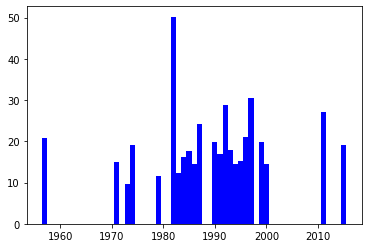

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

x = genre_sells['Released']
height = genre_sells['Total_Sells']
width = 1.0

plt.bar(x, height, width, color='b' )

plt.savefig('SimpleBar.png')
plt.show()

In [ ]:
import folium

coords = (48.8398094,2.5840685)
map = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=2)
map.save(outfile='map.html')